In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


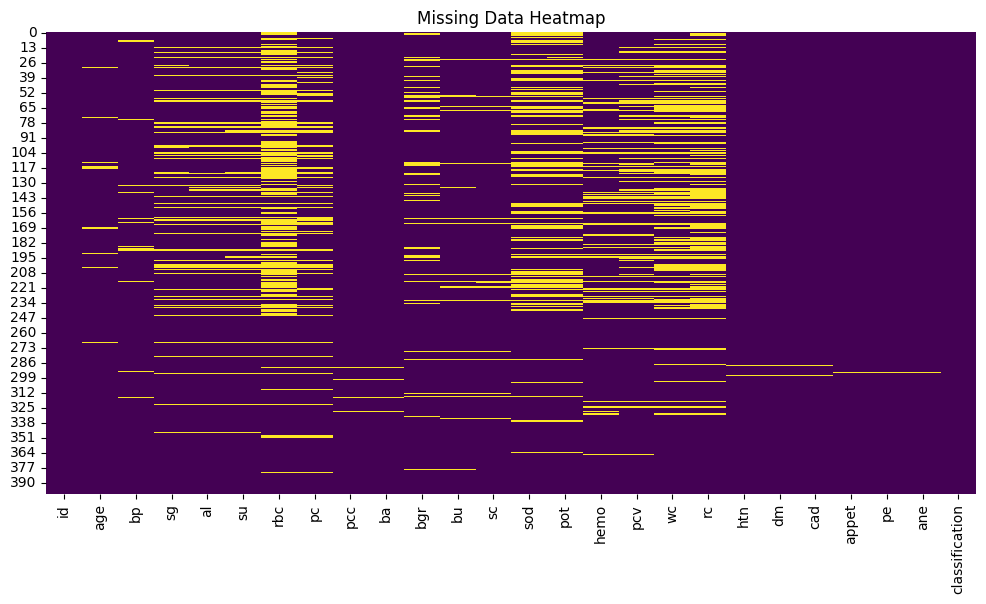

In [4]:
df = pd.read_csv('kidney_disease.csv')

# Visualizing missing data
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()


## Before filling the missing value logic

In [7]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [5]:

def filterByDtype(dataframe, dtype):
    return pd.DataFrame(dataframe.select_dtypes(include=[dtype])).columns

objColumnNamesArr = filterByDtype(df, 'object')
print("Object Column Names: ", objColumnNamesArr)
numColumnNamesArr = filterByDtype(df, 'float64')
print("Numeric Column Names: ", numColumnNamesArr)

Object Column Names:  Index(['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')
Numeric Column Names:  Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo'], dtype='object')


## Identify all the missing values and identify the percentage of missing values

In [8]:
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})
print(missing_df)

                Missing Values  Percentage
id                           0        0.00
age                          9        2.25
bp                          12        3.00
sg                          47       11.75
al                          46       11.50
su                          49       12.25
rbc                        152       38.00
pc                          65       16.25
pcc                          4        1.00
ba                           4        1.00
bgr                         44       11.00
bu                          19        4.75
sc                          17        4.25
sod                         87       21.75
pot                         88       22.00
hemo                        52       13.00
pcv                         70       17.50
wc                         105       26.25
rc                         130       32.50
htn                          2        0.50
dm                           2        0.50
cad                          2        0.50
appet      

## Handling missing values on float columns and object columns

In [9]:

# mean_age = df["age"].astype(float).mean()
# df["age"].fillna(mean_age, inplace=True)

# mode_bp = df["bp"].mode()[0]
# df["bp"].fillna(mode_bp, inplace=True)

def fillna_with_mean(column_names):
    for column_name in column_names:
     mean_value = df[column_name].mean()
     df[column_name].fillna(mean_value, inplace=True)

def fillna_with_mode(column_names):
    for column_name in column_names:
     mode_value = df[column_name].mode()[0]
     df[column_name].fillna(mode_value, inplace=True)
    
fillna_with_mean(numColumnNamesArr)
fillna_with_mode(objColumnNamesArr)


df.isnull().sum()



/var/folders/h3/4zbm2_gs3kvcp1xbhzzbl3zh0000gp/T/ipykernel_88016/1906508433.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column_name].fillna(mean_value, inplace=True)
/var/folders/h3/4zbm2_gs3kvcp1xbhzzbl3zh0000gp/T/ipykernel_88016/1906508433.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

## skness before transformation on age column - doing this on my self interest 

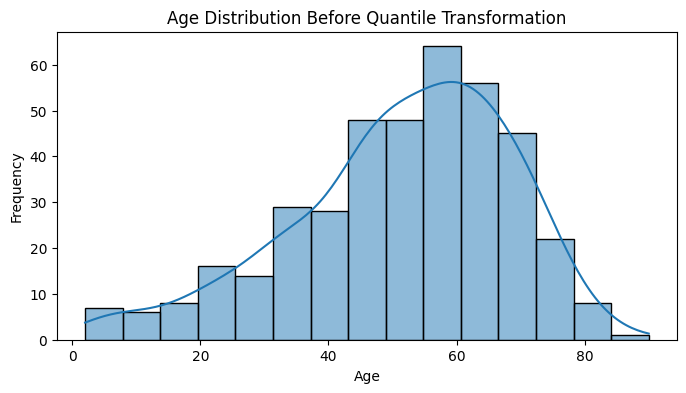

In [10]:

# plot sknewness using seaborn
plt.figure(figsize=(8, 4))
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution Before Quantile Transformation')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## applying QuantileTransformer to get rid of the skness in the age

/Users/solomonrajkumar.sathianandaraj/Library/CloudStorage/OneDrive-McKessonCorporation/Documents/Solo_docs/INTO_United_States/Learning_Path/Hope_AI/Start_Course/Week_2_Python/myevn/lib/python3.13/site-packages/sklearn/preprocessing/_data.py:2846: UserWarning: n_quantiles (1000) is greater than the total number of samples (400). n_quantiles is set to n_samples.
  warnings.warn(


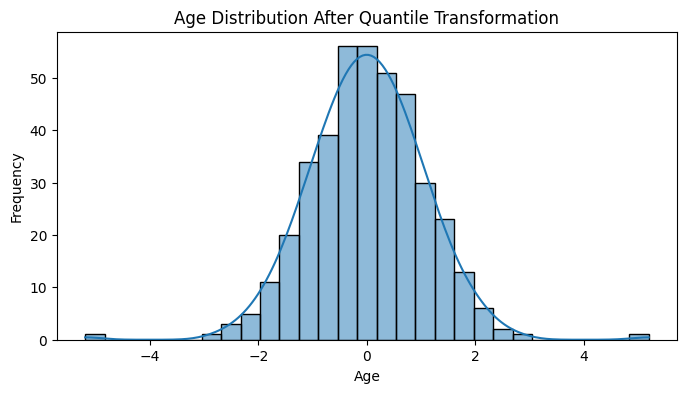

age    0
dtype: int64

In [11]:
from sklearn.preprocessing import QuantileTransformer

# Transform to normal distribution
qt = QuantileTransformer(output_distribution='normal', random_state=42)
age_transformed = qt.fit_transform(df[['age']])
df['age'] = age_transformed
# plot sknewness using seaborn
plt.figure(figsize=(8, 4))
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution After Quantile Transformation')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

df[['age']].isnull().sum()

## applying the Kurtosis

/var/folders/h3/4zbm2_gs3kvcp1xbhzzbl3zh0000gp/T/ipykernel_88016/3496173396.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(mean_age, inplace=True)


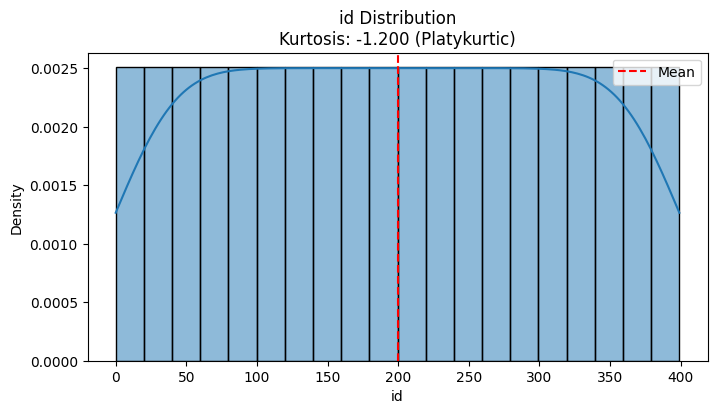

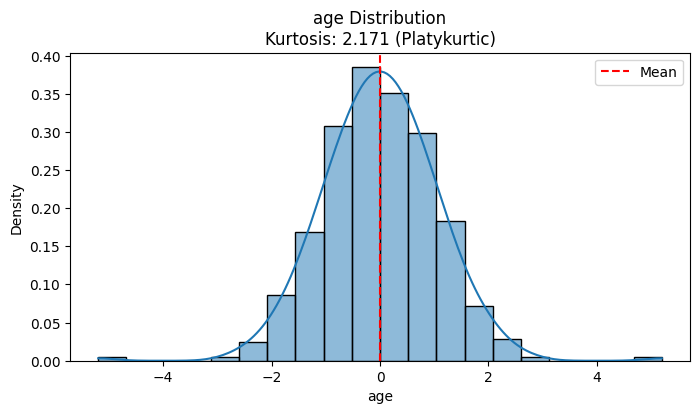

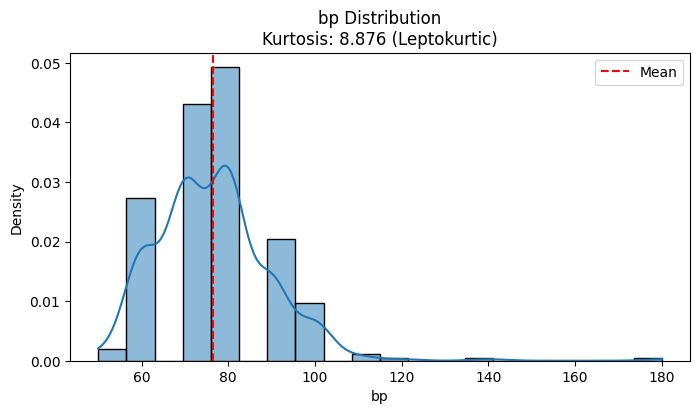

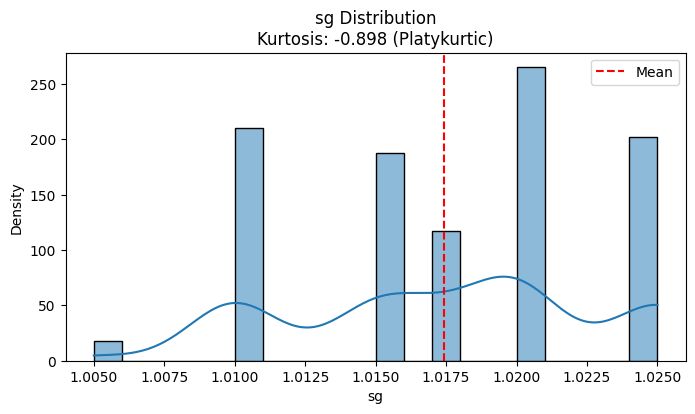

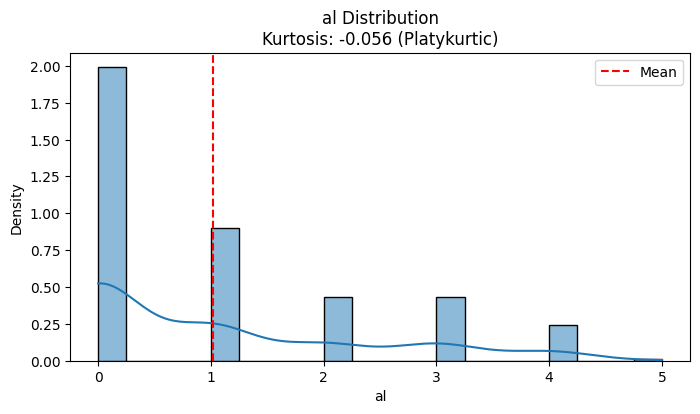

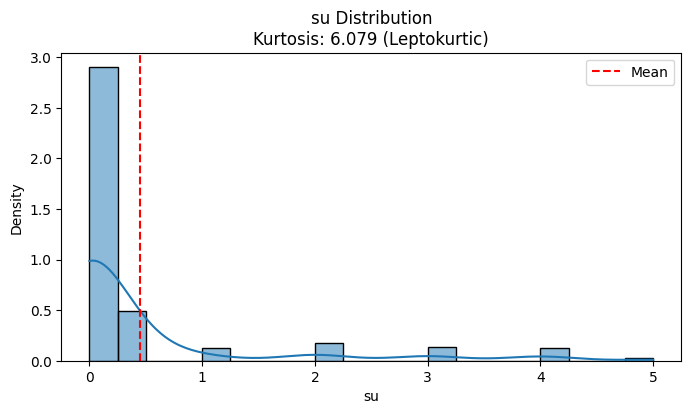

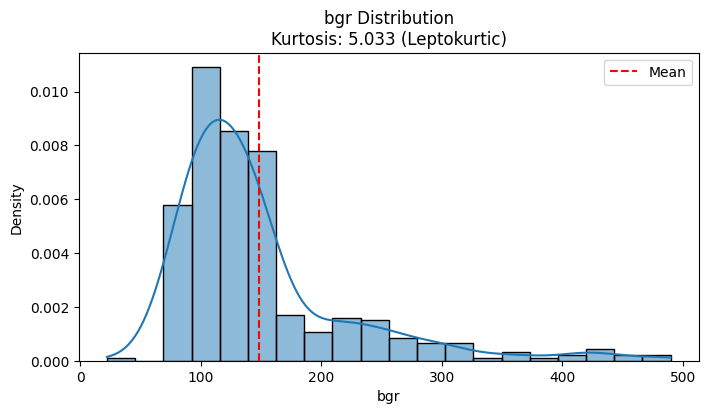

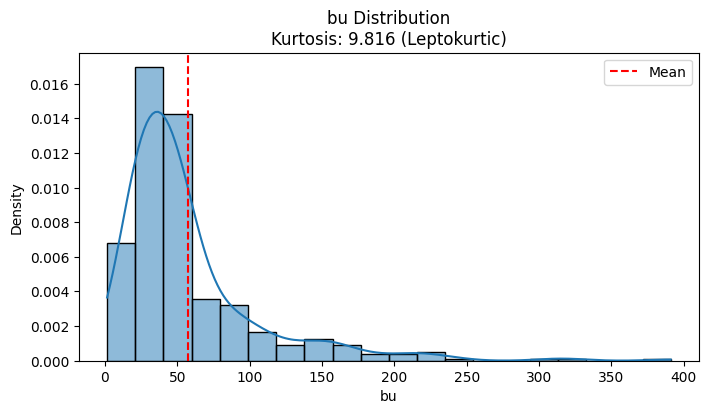

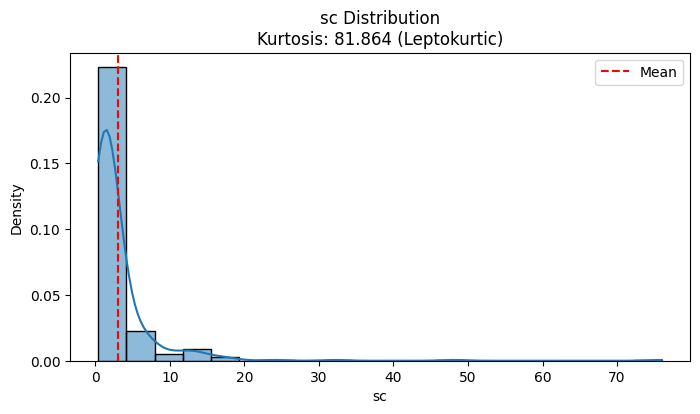

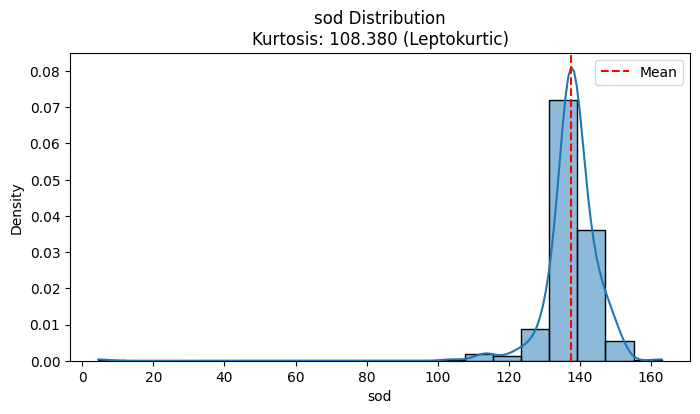

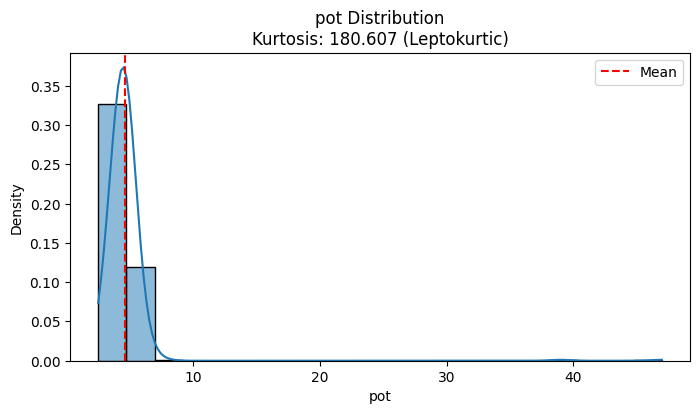

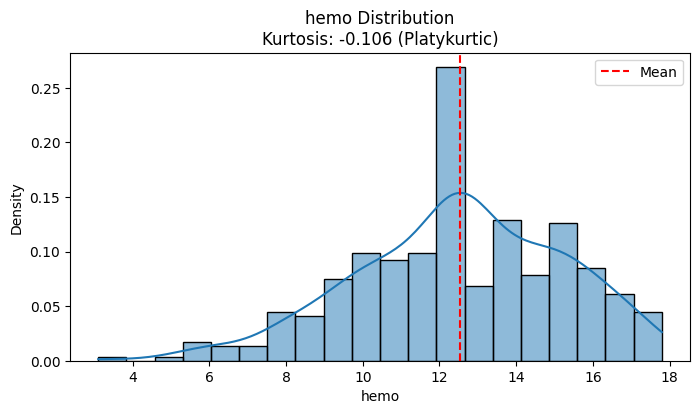

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

mean_age = df["age"].astype(float).mean()
df["age"].fillna(mean_age, inplace=True)

# Calculate kurtosis
#kurt = stats.kurtosis(df['age'])

# Plot histogram with KDE
# plt.figure(figsize=(10, 6))
# sns.histplot(df['age'], kde=True, stat='density', bins=20)
# plt.axvline(df['age'].mean(), color='red', linestyle='--', label='Mean')
# plt.title(f'Age Distribution\nKurtosis: {kurt:.3f}')
# plt.xlabel('Age')
# plt.ylabel('Density')
# plt.legend()
# plt.show()

# # apply kurtosis on the multiple columns and plot it
# numeric_columns = df.select_dtypes(include=[np.number]).columns
# for column in numeric_columns:
#     kurt = stats.kurtosis(df[column])
#     plt.figure(figsize=(10, 6))
#     sns.histplot(df[column], kde=True, stat='density', bins=20)
#     plt.axvline(df[column].mean(), color='red', linestyle='--', label='Mean')
#     plt.title(f'{column} Distribution\nKurtosis: {kurt:.3f}')
#     plt.xlabel(column)
#     plt.ylabel('Density')
#     plt.legend()
#     plt.show()

# apply kurtosis to check platykurturic, leptokurtic, mesokurtic
numeric_columns = df.select_dtypes(include=[np.number]).columns

    

def applyKurtosisOnNumericColumns(column_names):
    for column in column_names:
        kurt = stats.kurtosis(df[column])
        if kurt < 3:
            kurtosis_type = 'Platykurtic'
        elif kurt > 3:
            kurtosis_type = 'Leptokurtic'
        else:
            kurtosis_type = 'Mesokurtic'
        plt.figure(figsize=(8, 4))
        sns.histplot(df[column], kde=True, stat='density', bins=20)
        plt.axvline(df[column].mean(), color='red', linestyle='--', label='Mean')
        plt.title(f'{column} Distribution\nKurtosis: {kurt:.3f} ({kurtosis_type})')
        plt.xlabel(column)
        plt.ylabel('Density')
        plt.legend()
        plt.show()
         
applyKurtosisOnNumericColumns(numeric_columns)